


> # Market Segmentation Analysis using Macdonal dataset (Case study)



# Step 1: Deciding (not) to Segment


# Step 2: Specifying the Ideal Target Segment
Management decides which key features makes market segment attractive to them.  Follow the
1. knock out criteria (segment must be): homogeneous, distinct, large enough, matching the strength of macdonal, identifiable, reachable.
2. attractiveness criteria: liking macdonal and frequently eating at macdonal

# Step 3: Collecting data
contains responses from 1453 adult Australian consumers. <br>attributes (yes and no): YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. <br> other attributes: age, gender,VisitFrequency, like

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 4: Exploring Data


In [79]:
# loading/ reading the data
df = pd.read_csv('/content/drive/MyDrive/csv files/mcdonalds.csv')


In [ ]:
df.head(3) # 1st 3 rows of the data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
df.shape # sample size or dimension

(1453, 15)

In [ ]:
df.columns # varaible names

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Here segmentation variables (perception
of McDonald’s) is Yes-No type. Need to convert it to numeric. so will extract 1st 11 columns from the data (segmetation varaible).

In [80]:
# selecting the 1st 11 columns to convert their values to 1 and 0 (binary)
conv_df = df.iloc[:,:11]

# converting yes to 1 and no to 0
#conv_df = (conv_df=='Yes).astype(int)
conv_df = conv_df.apply(lambda x: x.map({'Yes':1,'No':0}))
conv_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0


In [ ]:
mean_values= np.round(conv_df.mean(),2)
transposed_mean = mean_values.to_frame().transpose()
transposed_mean

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.55,0.91,0.09,0.87,0.53,0.9,0.6,0.64,0.36,0.2,0.24


average values of segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

## PCA


> compute a principal components analysis to create a perceptual map called as factor-cluster analysis. (note- not not using it for dimensinality reduction). A perceptual map offers initial insights into
how attributes are rated by respondents and, importantly, which attributes tend to be
rated in the same way.<br> principal component - rotate
and project the data for the perceptual map.




In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# didnot standardized because all segmentation variable are binary

In [ ]:
pca = PCA()
pca.fit_transform(conv_df)

array([[-0.42536706,  0.21907878, -0.6632553 , ..., -0.18100693,
        -0.51570617,  0.56707389],
       [ 0.21863768, -0.38818996,  0.73082668, ..., -0.11147641,
        -0.49331285,  0.50044033],
       [-0.37541475, -0.73043507,  0.12203978, ...,  0.32228786,
        -0.06175857, -0.24274108],
       ...,
       [ 0.18589445, -1.06266156, -0.22085675, ..., -0.03825472,
        -0.05651822,  0.01279977],
       [ 1.18206441,  0.03856977, -0.56156066, ..., -0.02226748,
         0.00257265,  0.10531631],
       [-1.55024186, -0.27503101,  0.01373727, ...,  0.13658866,
         0.43279782,  0.45607556]])

In [ ]:
pca.feature_names_in_

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype=object)

In [ ]:
# standard deviation/ sqrt of eigen value
std = np.sqrt(pca.explained_variance_)
# Proportion of varaince or explained variance ratio
explaind_variance = pca.explained_variance_ratio_
# cumulative proportion
cum_sum = np.cumsum(explaind_variance)

summary_df = pd.DataFrame({
    'Feature': pca.feature_names_in_,
    'Standard Deviation': std,
    'Explained Variance': explaind_variance,
    'Cumulative Sum': cum_sum
})


In [ ]:
print('Importance of components')
summary_df

Importance of components


,Feature,Standard Deviation,Explained Variance,Cumulative Sum
0,yummy,0.757050,0.299447,0.299447
1,convenient,0.607456,0.192797,0.492244
2,spicy,0.504619,0.133045,0.625290
3,fattening,0.398799,0.083096,0.708386
4,greasy,0.337405,0.059481,0.767866
5,fast,0.310275,0.050300,0.818166
6,cheap,0.289697,0.043849,0.862015
7,tasty,0.275122,0.039548,0.901563
8,expensive,0.265251,0.036761,0.938323
9,healthy,0.248842,0.032353,0.970677


Results from principal components analysis indicate that the first two components (explained_variance of yummy and convenient )
capture about 50% of the information contained in the segmentation variables.

In [ ]:
# Factor loadings (principal components or eigen vectors)
factor_loadings = pca.components_
factor_loadings_df = pd.DataFrame(factor_loadings, columns= conv_df.columns)

# Rename index as PC1, PC2, ..., PC11
factor_loadings_df.index = [f'PC{i+1}' for i in range(factor_loadings_df.shape[0])]

factor_loadings_df.transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,0.763488,-0.287846,0.178226,-0.349616,-0.176303,0.185572,0.038117,-0.157608


The loadings indicate how the original variables are combined to form principal
components. Loadings guide the interpretation of principal components.<br> e.g. 2 segmentation variables with the highest loadings (in absolute
terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this
principal component captures the price dimension.

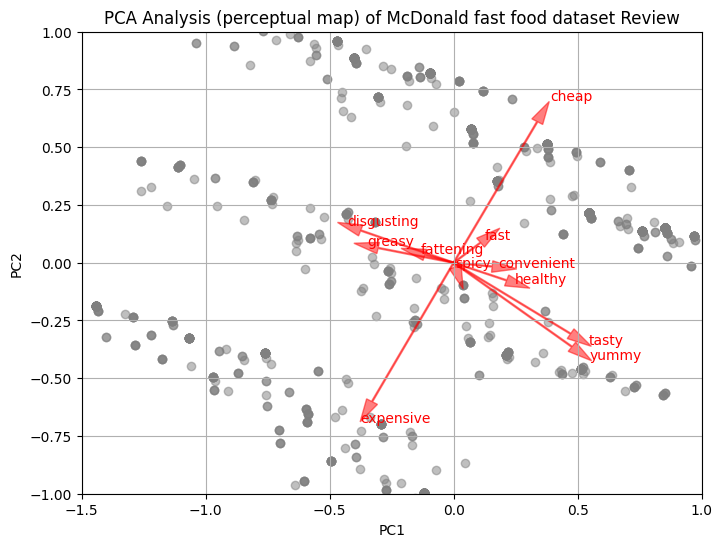

In [ ]:
pca_result = pca.transform(conv_df)
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis (perceptual map) of McDonald fast food dataset Review')

# plot the 1st two principal components as arrows (axes)
for i in range(pca.components_.shape[1]):
  plt.arrow(0,0, pca.components_[0,i], pca.components_[1,i], color='red', alpha=0.5,
            head_width=0.05, head_length=0.1, width=0.005)

 # label the arrow
  plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15,
           conv_df.columns[i], color='r')

plt.xlim([-1.5,1])
plt.ylim([-1,1])
plt.grid(True)
plt.show()

From the above graph attributes CHEAP and
EXPENSIVE are crucial in evaluation.<br>negative attributes: FATTENING,
DISGUSTING and GREASY point in the same direction in the perceptual chart,
indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are
also likely to view it as GREASY.<br>positive attributes are in the opposite direction
FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY.<br> 3 group of respondents(clusters) are found cheap, expensive and middle -> price dimension critical in differentiating b/w groups of consumer

# Step 5: Extracting segments/ segment extraction technique (algorithms)

## A. Using K-Means
using k-means anlysis to extract 2 to 8 segments and than using an elbow/scree plot/inertia to get the best no of market segment. Goal is to get the best segment no which can extract the the segment having similar consumer but they are different from other segments. (homogenuous within segment and hetrogenous between segments)

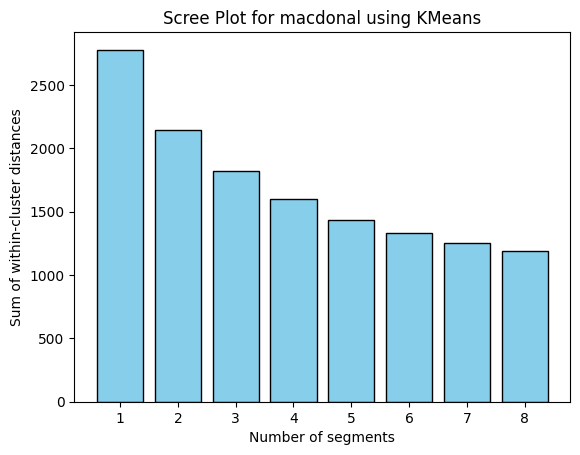

In [ ]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {} # dictionary to store the k-means models for each value of k

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(conv_df)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[k] = kmeans

plt.bar(num_segments, within_cluster_distances, color='skyblue', edgecolor='black')
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree Plot for macdonal using KMeans")
plt.show()

 The screeplot(elbow method) is useful when the sum of within-cluster distances starts to decrease quickly with the number of clusters and then the decrease slows down significantly. This "elbow" point suggests the optimal number of clusters. <br> But this plot has no distinct elbow a the sum of distances within
market segments drops slowly as the number of market segments increases.<br>here as the number of segments increases its natural that the segment size decreases, so we find that segment members are similar to one another. But this plot doesnot help us to extra relevant no of market segment. <br> so will go for stability based data structure analysis.

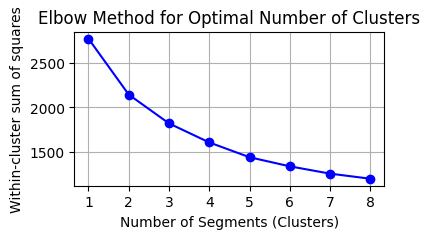

In [ ]:
# Plot the within-cluster sum of squares vs. number of clusters
plt.figure(figsize=(4,2))
plt.plot(range(1, 9), within_cluster_distances, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-cluster sum of squares')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()


In [81]:
from sklearn.metrics import silhouette_score
n_clusters_range = range(2,9)
for k in n_clusters_range:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(conv_df)
  print('cluster size -', k, 'Silhoutte score -',silhouette_score(conv_df, kmeans.labels_))

cluster size - 2 Silhoutte score - 0.24441701827275675
cluster size - 3 Silhoutte score - 0.23649965105414844
cluster size - 4 Silhoutte score - 0.2580595854833568
cluster size - 5 Silhoutte score - 0.26118721542062856
cluster size - 6 Silhoutte score - 0.2652225028556901
cluster size - 7 Silhoutte score - 0.27963997194313844
cluster size - 8 Silhoutte score - 0.29200570304380546


In [82]:
kmeans = KMeans(n_clusters=8, n_init=10) # 8 has high score than others so fitting the algo for 8 no of clusters
kmeans.fit(conv_df)

KMeans(n_init=10)

In [83]:
labels = kmeans.labels_
conv_df['cluster']= labels
conv_df.cluster.value_counts()

,count
cluster,
2,266
4,256
1,199
5,175
6,168
7,143
0,130
3,116


### t-SNE (t-Distributed Stochastic Neighbor Embedding)
 a  dimensionality reduction technique, useful for clustering visualization.

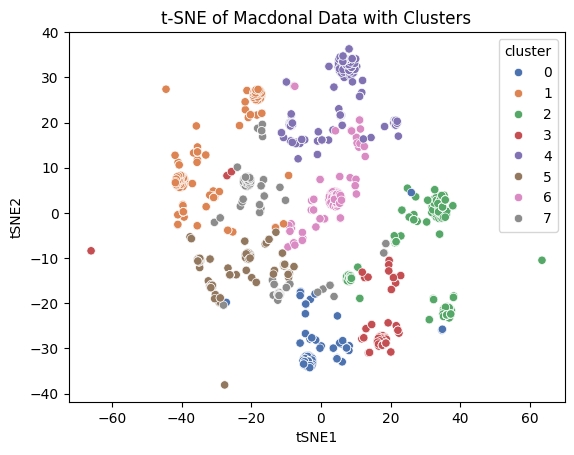

In [86]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(conv_df.drop(columns='cluster'))

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_components, columns=['tSNE1', 'tSNE2'])
tsne_df['cluster'] = conv_df['cluster']

# Plot
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df, hue='cluster', palette='deep')
plt.title('t-SNE of Macdonal Data with Clusters')
plt.show()


In [ ]:
MD_km28

{1: KMeans(n_clusters=1, n_init=10, random_state=1234),
 2: KMeans(n_clusters=2, n_init=10, random_state=1234),
 3: KMeans(n_clusters=3, n_init=10, random_state=1234),
 4: KMeans(n_clusters=4, n_init=10, random_state=1234),
 5: KMeans(n_clusters=5, n_init=10, random_state=1234),
 6: KMeans(n_clusters=6, n_init=10, random_state=1234),
 7: KMeans(n_clusters=7, n_init=10, random_state=1234),
 8: KMeans(n_init=10, random_state=1234)}

### Global Stability - (boxplot) - bootstrapping and clustering analysis
Global stability is the extent to which the same segmentation solution emerges
if the analysis is repeated many times using bootstrap samples.<br> This approach, known as stability-based data structure analysis, helps determine the optimal number of segments. it indicates whether market segments occur naturally in the data.

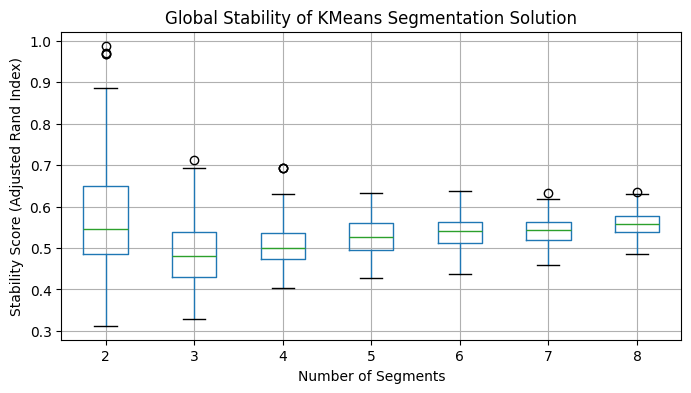

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

np.random.seed(1234)

def bootstrap_kmeans_ari(data, min_clusters=2, max_clusters=8, nboot=100, nrep=10):
    stability_results = {k: [] for k in range(min_clusters, max_clusters+1)}

    for k in range(min_clusters, max_clusters+1):
        for _ in range(nboot):
            # Bootstrap sample
            bootstrap_sample = resample(data, n_samples=len(data), random_state=np.random.randint(0, 10000))
            cluster_assignments = []

            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
                kmeans.fit(bootstrap_sample)
                cluster_assignments.append(kmeans.labels_)

            # Compare cluster assignments using Adjusted Rand Index (ARI)
            ari_scores = []
            for i in range(nrep):
                for j in range(i+1, nrep):
                    # Calculate ARI between two different clusterings
                    ari = adjusted_rand_score(cluster_assignments[i], cluster_assignments[j])
                    ari_scores.append(ari)

            stability_results[k].append(np.mean(ari_scores))

    return stability_results


results = bootstrap_kmeans_ari(conv_df, min_clusters=2, max_clusters=8, nboot=100, nrep=10)

# Convert the results into a DataFrame for easier plotting
stability_df = pd.DataFrame(results)

# Plotting the boxplot for global stability
plt.figure(figsize=(8, 4))
stability_df.boxplot()
plt.xlabel('Number of Segments')
plt.ylabel('Stability Score (Adjusted Rand Index)')
plt.title('Global Stability of KMeans Segmentation Solution')
plt.xticks(np.arange(len(stability_df.columns)) + 1, stability_df.columns)
plt.show()


vertical boxplots show the distribution of stability for each number of
segments. The median is indicated by the horizontal line in the middle
of the box. Higher stability is better. <br> Adjusted Rand Index (ARI) is a measure of the similarity between two data clusterings. best possible value for ARI is 1.0, which indicates a perfect match between the clusterings. <br><br> segement 2 and 8 seems to be quite stable. Solutions containing a small number of segments (here 2)
typically lack the market insights managers are interested in. so we can go with 8.<br>  this plot assesses global stability by comparing segmentation solutions across repeated bootstrap sampling, computing ARI scores for each clustering solution, and visualizing the results with boxplots.

### Gaining insight into structure of 8 segment solution  using Gorge plots
method to assess how well segments are separated. it look at the
distances of each consumer to all segment respresentatives (centroids). it access the similarity of consumer(point) to the centroid. <br> high similarity values indicate that a consumer is
very close to the centroid (the segment representative) of the market segment. Low
similarity values indicate that the consumer is far away from the centroid.
<br>good gorge-  most consumers are either close to their segment
representative or far away from the representatives of other market segments. <br>Not so good-
many consumers sit in the middle of the plot, indicating that they are neither
very close to their segment representative, nor very far away from the segment
representatives of other clusters.

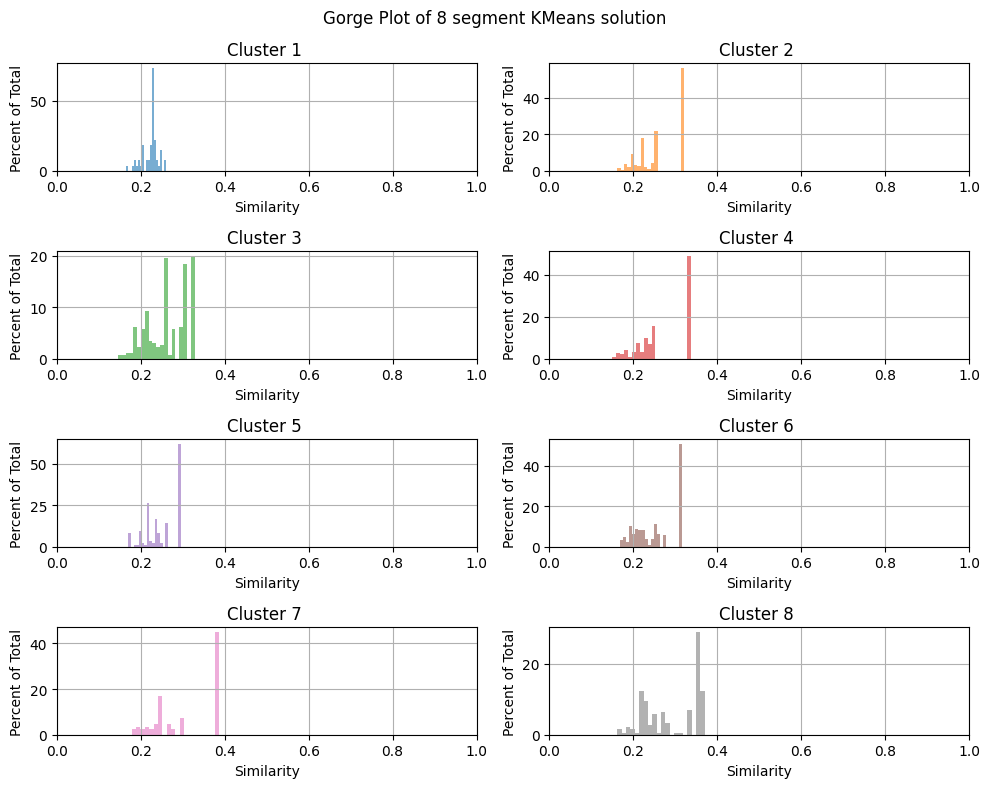

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt


conv_df = conv_df  #  DataFrame

# Step 1: Run KMeans clustering on your data (use the optimal cluster number from ARI analysis)
optimal_clusters = 8  # This could be determined from your ARI code or chosen based on stability results
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(conv_df)

# Step 2: Calculate similarities
# formula is used to compute the similarity score of each data point to each cluster
# transform the distances between data points and cluster centers into similarity scores,
# which are then normalized.

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate pairwise distances from each consumer to each cluster center (d_ih)
distances = pairwise_distances(conv_df, centroids)

# Hyperparameter γ to control how distances translate into similarity
gamma = 1.0

# Calculate similarity (s_ih) for each consumer to each cluster (using the formula)
similarities = np.exp(-distances / gamma)
similarities /= similarities.sum(axis=1)[:, np.newaxis]  # Normalize to sum to 1 for each consumer

# Step 3: Plot the Gorge Plot with 4 histograms (one for each cluster)
fig, axes = plt.subplots(4, 2, figsize=(10, 8))
fig.suptitle("Gorge Plot of 8 segment KMeans solution")
# Set x-label and y-label
for i, ax in enumerate(axes.flatten()):
    # Extract the similarities for the cluster i
    cluster_similarities = similarities[labels == i, i]

    # Plot the histogram
    ax.hist(cluster_similarities, bins=20, density=True, alpha=0.6, color=f'C{i}')
    ax.set_title(f"Cluster {i+1} ")
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Percent of Total")
    ax.set_xlim(0, 1)
    ax.grid(True)

# Adjust layout for the subplots
plt.tight_layout()

plt.show()



In the above Gorge plot none of the segments is well separated from the other segments,
and proximity to at least one other segment is present as indicated by the similarity
values all being between 0.2 to 0.4

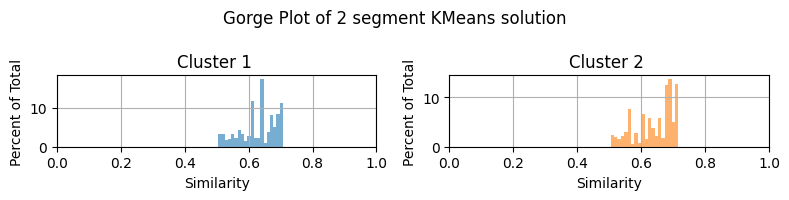

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

conv_df = conv_df  # DataFrame

# Step 1: Run KMeans clustering on your data (using 2 clusters for the new solution)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(conv_df)

# Step 2: Calculate similarities
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate pairwise distances from each consumer to each cluster center (d_ih)
distances = pairwise_distances(conv_df, centroids)

# Hyperparameter γ to control how distances translate into similarity
gamma = 1.0

# Calculate similarity (s_ih) for each consumer to each cluster (using the formula)
similarities = np.exp(-distances / gamma)
similarities /= similarities.sum(axis=1)[:, np.newaxis]  # Normalize to sum to 1 for each consumer

# Step 3: Plot the Gorge Plot with 2 histograms (one for each cluster)
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
fig.suptitle("Gorge Plot of 2 segment KMeans solution")
# Set x-label and y-label
for i, ax in enumerate(axes.flatten()):
    # Extract the similarities for the cluster i
    cluster_similarities = similarities[labels == i, i]

    # Plot the histogram
    ax.hist(cluster_similarities, bins=20, density=True, alpha=0.6, color=f'C{i}')
    ax.set_title(f"Cluster {i+1} ")
    ax.set_xlabel("Similarity")
    ax.set_ylabel("Percent of Total")
    ax.set_xlim(0, 1)
    ax.grid(True)

# Adjust layout for the subplots
plt.tight_layout()

plt.show()


segment 2 solution looks better than segment 8 solution as segments are comparatevely well separated than segment 8 and similarity score is also higher than segment 8.

### Segment level stability across solutions (SLSA) plot
 The purpose
of SLSA is to determine the re-occurrence of a market segment across market
segmentation solutions containing different numbers of segments.<br>represents Segment Level Stability Across Solutions (SLSA) by showing how market segments persist or shift as the number of segments increases from 2 to 8.

In [ ]:
print(MD_km28.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


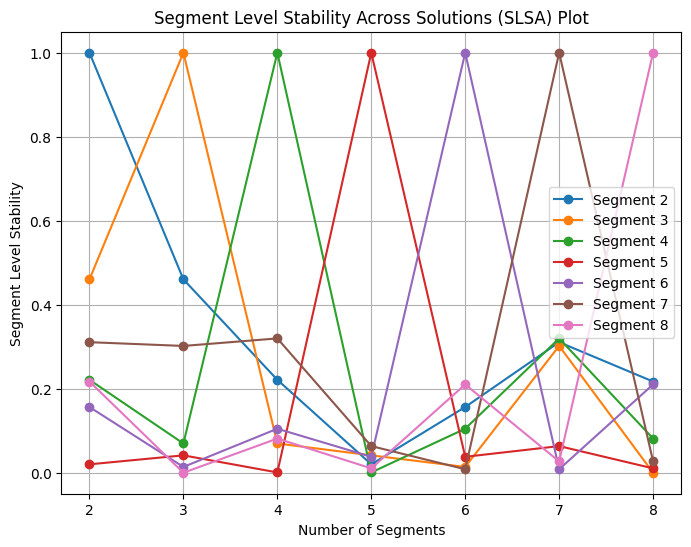

In [ ]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[segment].predict(conv_df)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

### Segment level Stability within solution using Jaccard_index formula

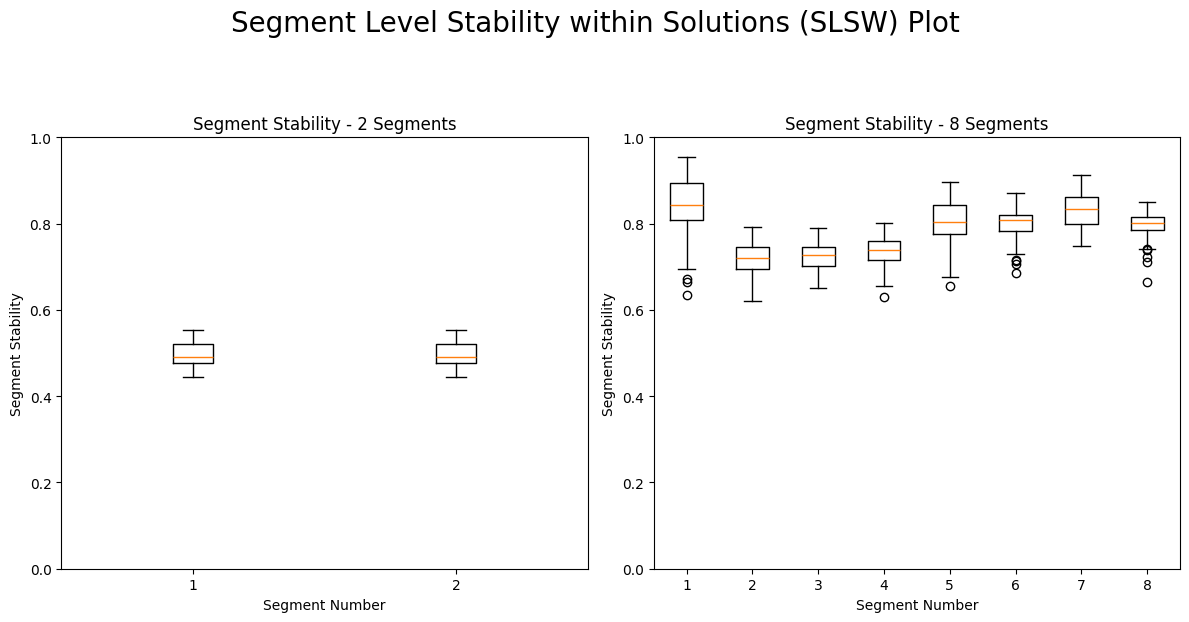

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score
from sklearn.utils import resample

# Define the Jaccard Index function to compare segments
def jaccard_index(segment1, segment2):
    intersection = np.sum(np.array(segment1) == np.array(segment2))
    union = len(segment1)
    return intersection / union

# Bootstrap sampling and clustering function
def bootstrap_clustering(data, k, original_labels, n_bootstrap=100):
    stability_scores = {i: [] for i in range(k)}

    for _ in range(n_bootstrap):
        sample_data = resample(data, replace=True, n_samples=len(data))
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(sample_data)
        bootstrap_labels = kmeans.labels_

        for i in range(k):
            original_segment = original_labels == i
            bootstrap_segment = bootstrap_labels == i
            stability_scores[i].append(jaccard_index(original_segment, bootstrap_segment))

    return stability_scores

# Example usage with synthetic data
np.random.seed(1234)
MD_x = conv_df

kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(MD_x)
labels_2 = kmeans_2.labels_

kmeans_8 = KMeans(n_clusters=8, random_state=42)
kmeans_8.fit(MD_x)
labels_8 = kmeans_8.labels_

stability_2 = bootstrap_clustering(MD_x, k=2, original_labels=labels_2, n_bootstrap=100)
stability_8 = bootstrap_clustering(MD_x, k=8, original_labels=labels_8, n_bootstrap=100)

plt.figure(figsize=(12, 6))
plt.suptitle('Segment Level Stability within Solutions (SLSW) Plot', y=1.03, fontsize=20)

plt.subplot(1, 2, 1)
plt.boxplot(list(stability_2.values()))
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability - 2 Segments")

plt.subplot(1, 2, 2)
plt.boxplot(list(stability_8.values()))
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability - 8 Segments")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


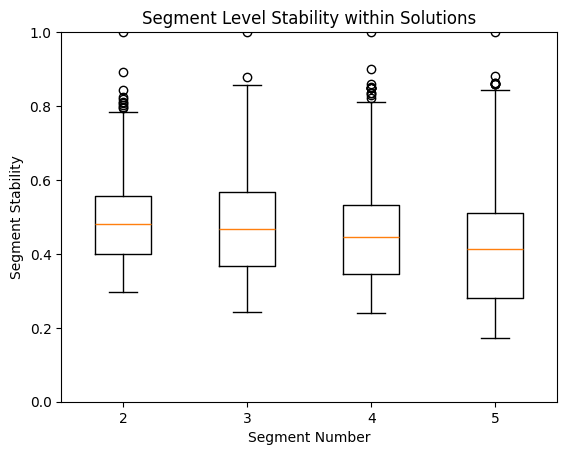

In [ ]:
segment_solutions = [2, 3, 4, 5]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(conv_df)
    segment_similarities[segment] = MD_km28[segment].transform(conv_df).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

## B. Using finite Mixtures of binary distributions
A **model-based methods** are also used in market segmentation analysis (segment extraction method). <br> will calculate latent class analysis using a finite mixture of binary distributions.
The mixture model maximises the likelihood to extract segments (as opposed to
minimising squared Euclidean distance, as is the case for k-means). <br>The maximum likelihood estimation uses information
criteria like Akaike information criterion or AIC, Bayesian information criterion or BIC, integrated completed likelihood or ICL. <br>Finite Mixture of Binary Distributions: A probabilistic model where each component follows a binary distribution. <br> In this will go with **Gaussian Mixture Model** (a probabilistic model) which is indeed a model based method making use of  Expectation-Maximization (EM) algorithm to maximize the likelihood of the model, making it more robust for complex clustering tasks.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import entropy


np.random.seed(1234)

conv_df = conv_df

# Calculate metrics for GaussianMixture model for k = 2 to 8
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    # Fit GaussianMixture model (mixture of distributions)
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(conv_df)

    # Metrics calculation
    iter_val = model.n_iter_
    converged = model.converged_
    k_val = k
    k0_val = k
    log_likelihood = model.score(conv_df) * conv_df.shape[0]  # Log-likelihood for GaussianMixture
    n_samples, _ = conv_df.shape

    # AIC and BIC calculation
    aic = model.aic(conv_df)  # AIC for GMM
    bic = model.bic(conv_df)  # BIC for GMM

    # Calculate entropy and ICL
    labels = model.predict(conv_df)  # Cluster labels based on model
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())  # Cluster probabilities
    class_entropy = entropy(probs)  # Entropy of the cluster distribution
    icl = bic - class_entropy  # ICL = BIC - entropy adjustment

    # Append to the results list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Create a DataFrame with the results
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Display the results
print(MD_m28)


   iter  converged  k  k0      logLik         AIC          BIC          ICL
0    12       True  2   2 -112.232108  486.464215   827.741510   827.082554
1     8       True  3   3  -83.993583  561.987165  1075.205692  1074.119961
2    17       True  4   4   -9.165556  544.331112  1229.490871  1228.142695
3    16       True  5   5   36.124988  585.750023  1442.851014  1441.271454
4    10       True  6   6  108.721838  572.556324  1601.598547  1599.819171
5     2       True  7   7  204.960951  512.078099  1713.061555  1711.136349
6     5       True  8   8  372.071759  309.856483  1682.781171  1680.726083


In [ ]:
MD_m28.columns

Index(['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'], dtype='object')

In [ ]:
print(MD_m28.isna().sum())


iter         0
converged    0
k            0
k0           0
logLik       0
AIC          0
BIC          0
ICL          0
dtype: int64


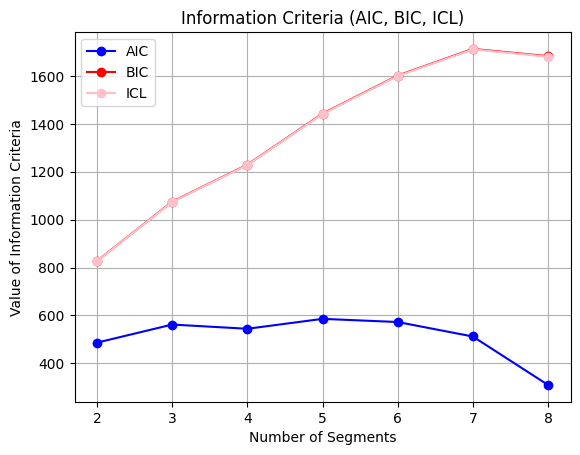

In [ ]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC',color='blue')
plt.plot(num_segments, BIC_values, marker='o', label='BIC', color='red')
plt.plot(num_segments, ICL_values, marker='o', label='ICL', color='pink')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

AIC, BIC, and ICL should typically **decrease** as the number of segments (clusters) increases, because adding more segments (clusters) generally leads to a better-fitting model, and these criteria penalize models with more parameters.<br>But we can observe increasing values for AIC, BIC, or ICL, indicating:

1. Overfitting this happens when the data doesn’t follow a normal distribution (an assumption of Gaussian model)
2.  Poor model fit (e.g., a Gaussian mixture model) might not be fitting the data well, and the added segments are not improving the fit.
<br> So will Try KMeans

### Using KMeans (distance based method) for evaluating AIC,BIC,ICL

In [ ]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(conv_df)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = conv_df.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0     logLik         AIC         BIC         ICL
0     8       True  2   2 -76.932228  157.864456  163.074796  162.397937
1     7       True  3   3 -69.718785  145.437570  153.253080  152.157521
2     8       True  4   4 -66.245375  140.490749  150.911430  149.555720
3    10       True  5   5 -63.052208  136.104416  149.130267  147.545093
4     8       True  6   6 -59.828169  131.656337  147.287358  145.499574
5     5       True  7   7 -56.730237  127.460474  145.696666  143.771460
6     6       True  8   8 -55.063425  126.126850  146.968212  144.921871


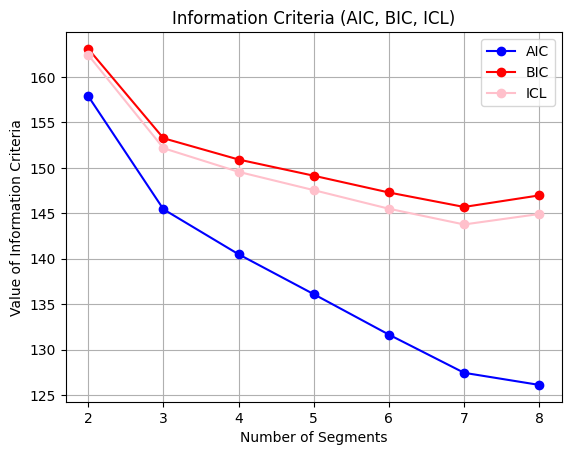

In [ ]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC',color='blue')
plt.plot(num_segments, BIC_values, marker='o', label='BIC', color='red')
plt.plot(num_segments, ICL_values, marker='o', label='ICL', color='pink')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

By visualizing the plot above, we can understand that KMeans, a distance-based model, is performing well as the AIC, BIC, and ICL are seen decreasing. Therefore, it has outperformed the model-based method for this dataset.<br>As can be seen, the
values of all information criteria decrease until seven components
(market segments) are reached. It suggest the
extraction of seven market segments (solution).

## C. Using Mixtures of Regression Models
finite mixtures of linear regression
models or latent class regressions will be used to extract market segment. <br>dependent variable - degree to which consumers love or hate McDonald’s<br> independent var - segmentation variables (perceptions of McDonald’s)

In [92]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [93]:
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [94]:
df['Like'] = df['Like'].replace({'I hate it!-5': -5,"I love it!+5": 5})
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 5, -5, '-2', '+3', '0', '-4', '-1'],
      dtype=object)

In [101]:
df['Like'] = df['Like'].astype(int)


In [100]:
df['Like'].dtype


dtype('int64')

In [104]:
df['Like'].value_counts().to_frame().T

Like,3,2,0,4,1,-5,5,-3,-4,-2,-1
count,229,187,169,160,152,152,143,73,71,59,58


In [105]:
import pandas as pd


mcdonalds = df

# Get the names of the first 11 columns (excluding 'Like')
features = mcdonalds.columns[:11]
like = mcdonalds['Like']

# Create the formula
formula = "Like.n ~ " + " + ".join(features)

# Output the formula
print(formula)


Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [108]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Defining the features (independent variables)
X = conv_df

# Defining the target variable (dependent variable)
y = df['Like']

# Initialize the GaussianMixture model with 2 components
gmm = GaussianMixture(n_components=2, random_state=1234)

# Fit the GMM to the data (fitting the mixture of models)
gmm.fit(X)

# Predict the component labels (which component each sample belongs to)
labels = gmm.predict(X)

# Initialize a dictionary to store the linear regression models for each component
reg_models = {}

# Fit a linear regression model for each component
for i in range(2):
    # Get the rows of X and y corresponding to the current component
    X_component = X[labels == i]
    y_component = y[labels == i]

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_component, y_component)

    # Store the model
    reg_models[i] = model

# Output the regression models for each component
for component, model in reg_models.items():
    print(f"Component {component} - Coefficients: {model.coef_}, Intercept: {model.intercept_}")


Component 0 - Coefficients: [ 2.40182522  0.95835785 -0.32598272 -0.57307988  0.08586208  0.10906589
  0.03886787  1.69427578 -0.15522982  0.37427636 -2.04712464 -0.1152933 ], Intercept: -1.474635507565426
Component 1 - Coefficients: [ 2.22258823  1.2210426  -0.36000754 -0.43896658 -0.38639016  0.49111612
  0.16234806  1.38750883  0.25387941  0.83467788 -1.55973136  0.17840281], Intercept: -3.353949848114609


In [111]:



# Define features (independent variables) and target variable
X = conv_df
y = df['Like']

# Initialize and fit the GaussianMixture model (with 2 components)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Predict the component labels (which component each sample belongs to)
labels = gmm.predict(X)

# Initialize a dictionary to store the linear regression models for each component
reg_models = {}

# Fit a linear regression model for each component
for i in range(2):
    # Get the rows of X and y corresponding to the current component
    X_component = X[labels == i]
    y_component = y[labels == i]

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_component, y_component)

    # Store the model
    reg_models[i] = model

# Now, collect the results (coefficients and intercepts) into a DataFrame
coefficients_list = []
intercepts_list = []

for component, model in reg_models.items():
    coefficients_list.append(model.coef_)
    intercepts_list.append(model.intercept_)

# Create a DataFrame with the results
coef_df = pd.DataFrame(coefficients_list, columns=X.columns)
coef_df['Intercept'] = intercepts_list

# Display the resulting DataFrame
print(coef_df)


      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  2.401825    0.958358 -0.325983  -0.573080  0.085862  0.109066  0.038868   
1  2.222588    1.221043 -0.360008  -0.438967 -0.386390  0.491116  0.162348   

      tasty  expensive   healthy  disgusting   cluster  Intercept  
0  1.694276  -0.155230  0.374276   -2.047125 -0.115293  -1.474636  
1  1.387509   0.253879  0.834678   -1.559731  0.178403  -3.353950  


# Step 6: Profiling

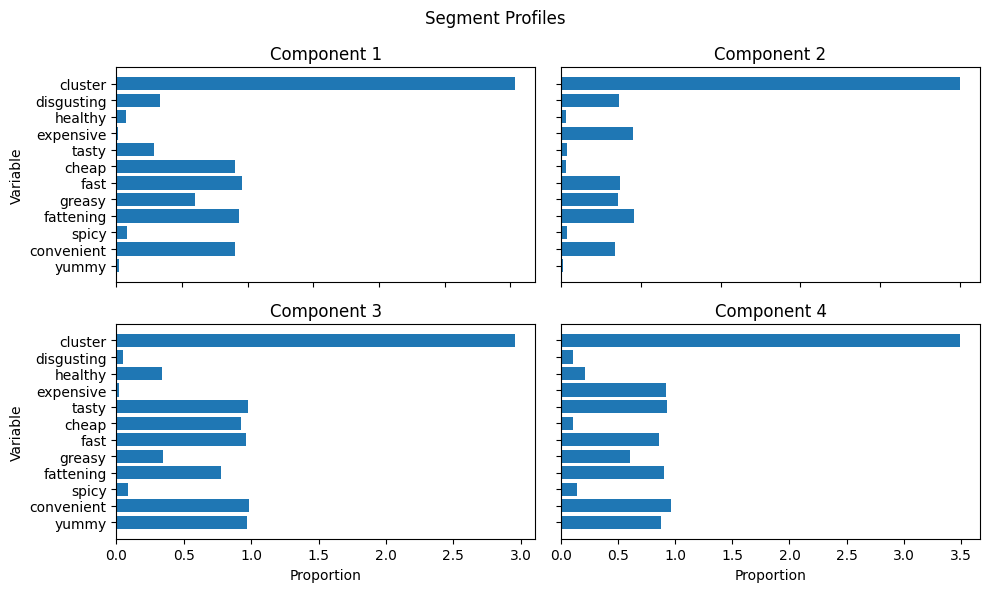

In [113]:
kmeans = MD_km28[4]

labels = kmeans.labels_

MD_mean = conv_df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(conv_df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

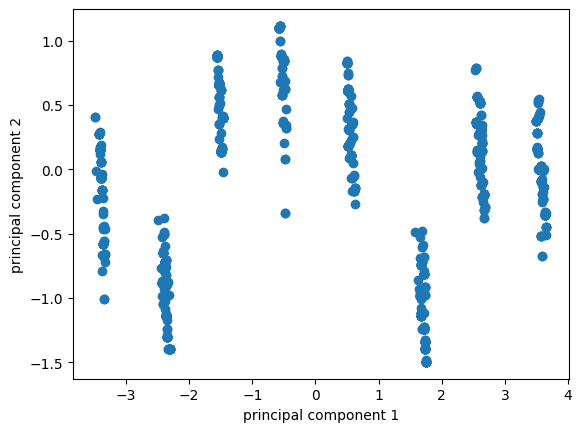

In [114]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(conv_df)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(conv_df)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()